In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In C:\Users\akhil\Anaconda3\envs\first\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\akhil\Anaconda3\envs\first\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\akhil\Anaconda3\envs\first\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\akhil\Anaconda3\envs\first\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\akhil\Anaconda3\envs\first\lib\site-

In [2]:
img_path=r"C:\Users\akhil\OneDrive\Pictures\cv_input_output\counters-exactly-one-hundred-round-260nw-565197802.webp"
image=cv2.imread(img_path)

print(image.shape)

(280, 260, 3)


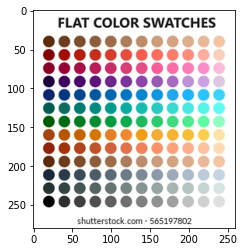

In [4]:
img_copy=np.copy(image)

img_copy=cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)

plt.imshow(img_copy)

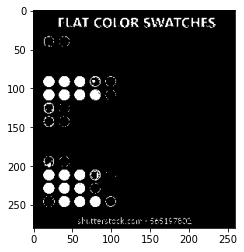

In [14]:
lower_blue=np.array([0,0,5])
upper_blue=np.array([90,90,255])

mask=cv2.inRange(img_copy,lower_blue,upper_blue)

plt.imshow(mask,cmap="gray")

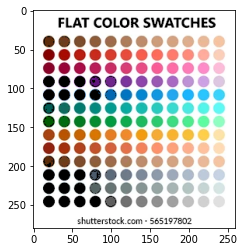

In [16]:
masked_image=np.copy(img_copy)
masked_image[mask!=0]=[0,0,0]

plt.imshow(masked_image)

in hsv

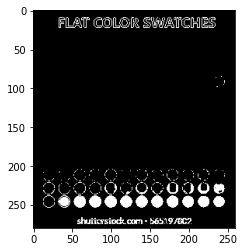

In [53]:
hsv_image=cv2.cvtColor(img_copy,cv2.COLOR_RGB2HSV)

#hsv is hue,saturation,value 
# hue angle of the color on the RGB color circle. A 0° hue results in red, 120° results in green, and 240° results in blue.
# saturation Saturation controls the amount of color used. A color with 100% saturation will be the purest color possible, while 0% saturation yields grayscale
# value Value controls the brightness of the color. A color with 0% brightness is pure black while a color with 100% brightness has no black mixed into the color

#For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255]. 
lower_blue=np.array([0,0,40])
upper_blue=np.array([180,18,230])

mask=cv2.inRange(hsv_image,lower_blue,upper_blue)

plt.imshow(mask,cmap="gray")   

In [57]:
np.count_nonzero(mask)

4419

In [60]:
mask.flatten().shape

(72800,)

In [49]:
#upper than lower limit
color_dict_HSV = {
    'black': [[180, 255, 30], [0, 0, 0]],
    'white': [[180, 18, 255], [0, 0, 231]],
    'red1': [[180, 255, 255], [159, 50, 70]],
    'red2': [[9, 255, 255], [0, 50, 70]],
    'green': [[89, 255, 255], [36, 50, 70]],
    'blue': [[128, 255, 255], [90, 50, 70]],
    'yellow': [[35, 255, 255], [25, 50, 70]],
    'purple': [[158, 255, 255], [129, 50, 70]],
    'orange': [[24, 255, 255], [10, 50, 70]],
    'gray': [[180, 18, 230], [0, 0, 40]],
    'pink' :[[180, 255, 255], [160, 0, 0]]
        }

{'black': 0.011112637362637363, 'white': 0.5282417582417582, 'red1': 0.03142857142857143, 'red2': 0.05326923076923077, 'green': 0.061304945054945055, 'blue': 0.04331043956043956, 'yellow': 0.0007692307692307692, 'purple': 0.02486263736263736, 'orange': 0.09589285714285714, 'gray': 0.06070054945054945, 'pink': 0.04302197802197802}


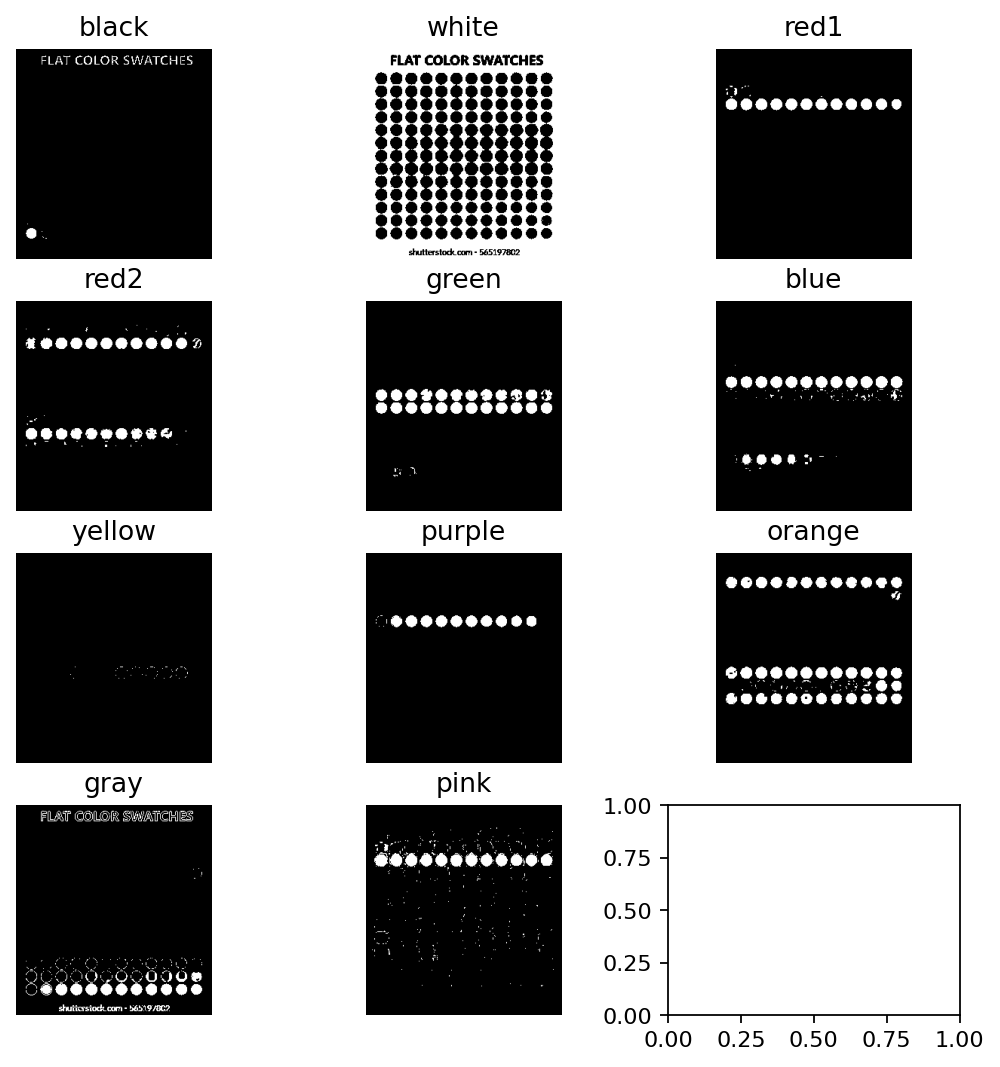

In [81]:
import math
result={}

fig, ax = plt.subplots(math.ceil(len(color_dict_HSV)/3), 3, figsize = (8,8), dpi = 160)

 
i=0
j=0
for key,value in color_dict_HSV.items():
    upper=np.array(value[0])
    lower=np.array(value[1])
    mask=cv2.inRange(hsv_image,lower,upper)
    count=np.count_nonzero(mask)
    total=mask.flatten().shape[0]
    result[key]=count/total
    ax[i,j].imshow(mask,cmap="gray")  
    ax[i,j].set_title(key)
    ax[i,j].axis('off')
    j+=1
    if j%3==0:
        j=0
        i+=1
    
print(result)

plt.show()

In [82]:
result

{'black': 0.011112637362637363,
 'white': 0.5282417582417582,
 'red1': 0.03142857142857143,
 'red2': 0.05326923076923077,
 'green': 0.061304945054945055,
 'blue': 0.04331043956043956,
 'yellow': 0.0007692307692307692,
 'purple': 0.02486263736263736,
 'orange': 0.09589285714285714,
 'gray': 0.06070054945054945,
 'pink': 0.04302197802197802}

In [96]:
result['red']=result['red1']+result['red2']
del result['red1']
del result['red2']

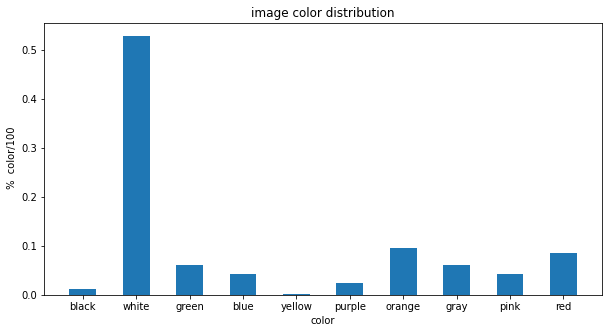

In [97]:
plt.figure(figsize=(10, 5))
plt.bar(*zip(*result.items()),width=0.5,align='center')
plt.xlabel("color")
plt.ylabel(" %  color/100")
plt.title("image color distribution")
plt.show()

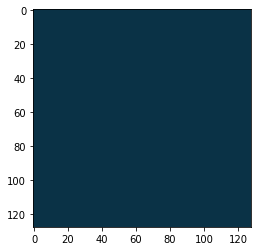

In [48]:
blank_image = np.zeros((128,128,3), np.uint8)
blank_image[:]=(10, 50, 70)

plt.imshow(blank_image,cmap="hsv")